# Fifa19 Exercise - Solutions

Welcome to a quick exercise for you to practice your pandas skills! We will be using the [Fifa19 Dataset](https://www.kaggle.com/winterbreeze/fifa19eda) from Kaggle! Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

#### Read fifa_eda.csv 

In [73]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(18,9)})

In [46]:
df = pd.read_csv('fifa_eda.csv')
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


### New Part Visualiztion Questions

#### Draw the outliers of players value

<AxesSubplot:xlabel='Value'>

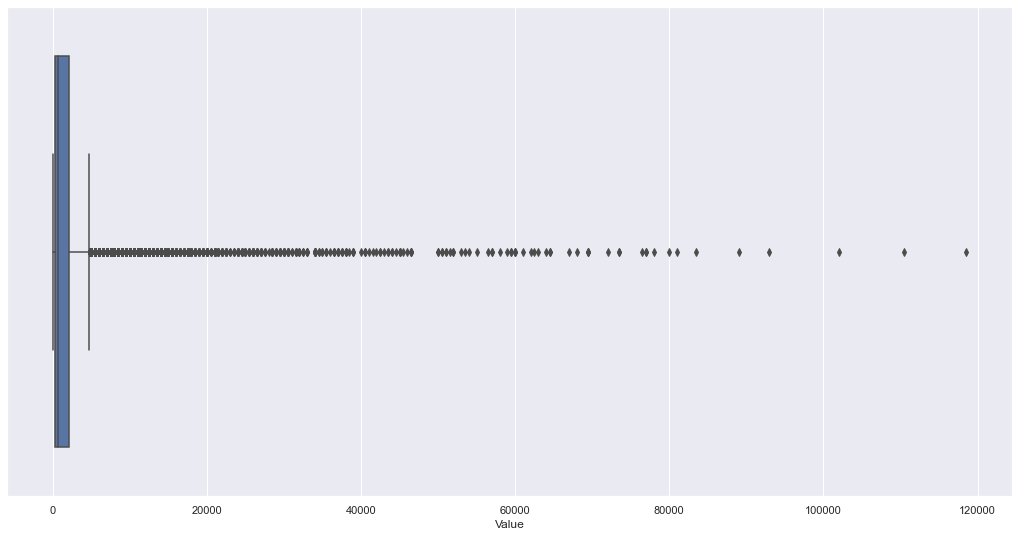

In [74]:
sns.boxplot(data = df, x= 'Value')

#### find the average wage for each Nationality and draw the outliers in value for the top 5 nationality

In [48]:
df.groupby('Nationality')[['Wage']].mean().sort_values(by= 'Wage',ascending= False)

,Wage
Nationality,
Dominican Republic,71.000000
United Arab Emirates,39.000000
Gabon,26.933333
Armenia,22.000000
Croatia,21.682540
...,...
Belize,1.000000
Andorra,1.000000
Jordan,1.000000


In [49]:
df.groupby('Nationality')[['Value']].mean().sort_values(by='Value',ascending= False)

,Value
Nationality,
United Arab Emirates,10500.000000
Dominican Republic,10400.000000
Central African Rep.,10050.000000
Egypt,6658.750000
Gabon,6628.333333
...,...
Indonesia,180.000000
Botswana,160.000000
Hong Kong,145.000000


In [50]:
x = df.groupby('Nationality')[['Value']].mean().sort_values(by='Value',ascending= False).index[:5]
x

Index(['United Arab Emirates', 'Dominican Republic', 'Central African Rep.',
       'Egypt', 'Gabon'],
      dtype='object', name='Nationality')

<AxesSubplot:xlabel='Nationality', ylabel='Value'>

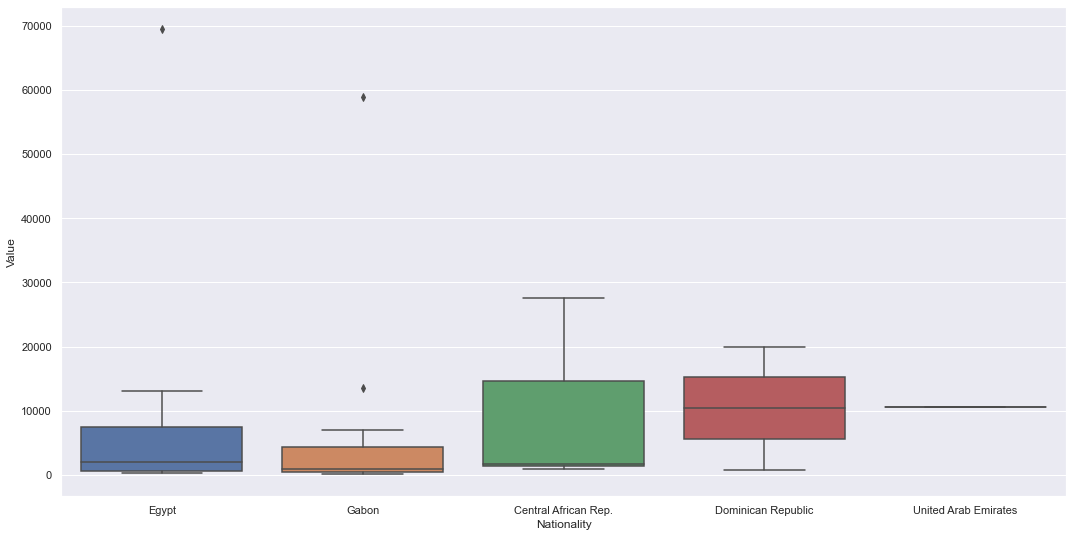

In [75]:
sns.boxplot(data=df[df['Nationality'].isin(x)],x='Nationality',y='Value')

#### Draw the distripution of players Height

<AxesSubplot:xlabel='Height', ylabel='Density'>

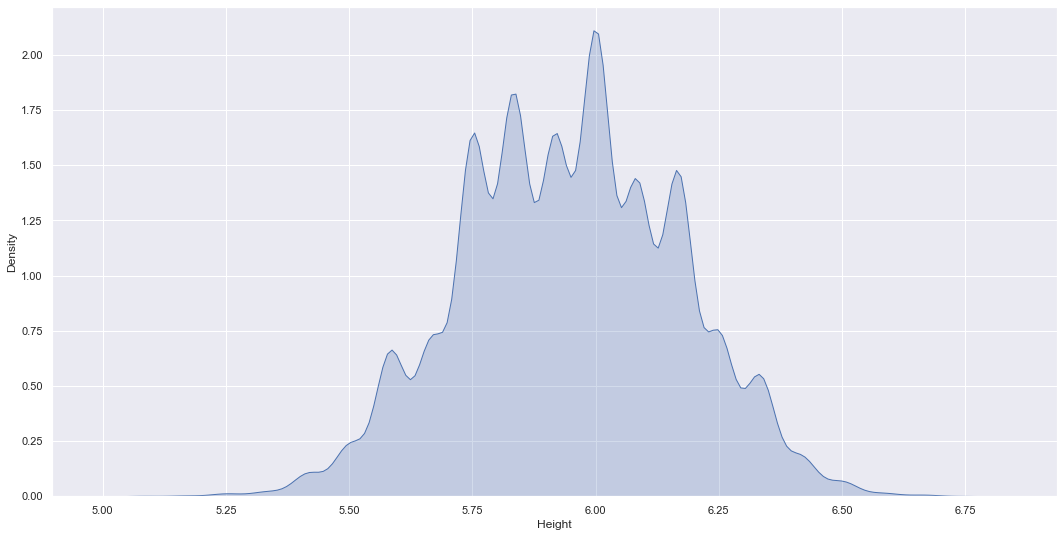

In [76]:
sns.kdeplot(data= df, x='Height',shade=True)

#### What are the top 10 clubs in the wage and visualize the results ?

In [78]:
res = df.groupby('Club')[['Wage']].sum().sort_values(by= 'Wage',ascending= False).head(10)
res

,Wage
Club,
Real Madrid,5017.0
FC Barcelona,4837.0
Manchester City,3741.0
Manchester United,3391.0
Juventus,3292.0
Chelsea,3249.0
Liverpool,2902.0
Tottenham Hotspur,2623.0
Arsenal,2588.0


In [60]:
y = df.groupby('Club')[['Wage']].sum().sort_values(by= 'Wage',ascending= False).index[:10]
y

Index(['Real Madrid', 'FC Barcelona', 'Manchester City', 'Manchester United',
       'Juventus', 'Chelsea', 'Liverpool', 'Tottenham Hotspur', 'Arsenal',
       'FC Bayern München'],
      dtype='object', name='Club')

<AxesSubplot:xlabel='Club', ylabel='Wage'>

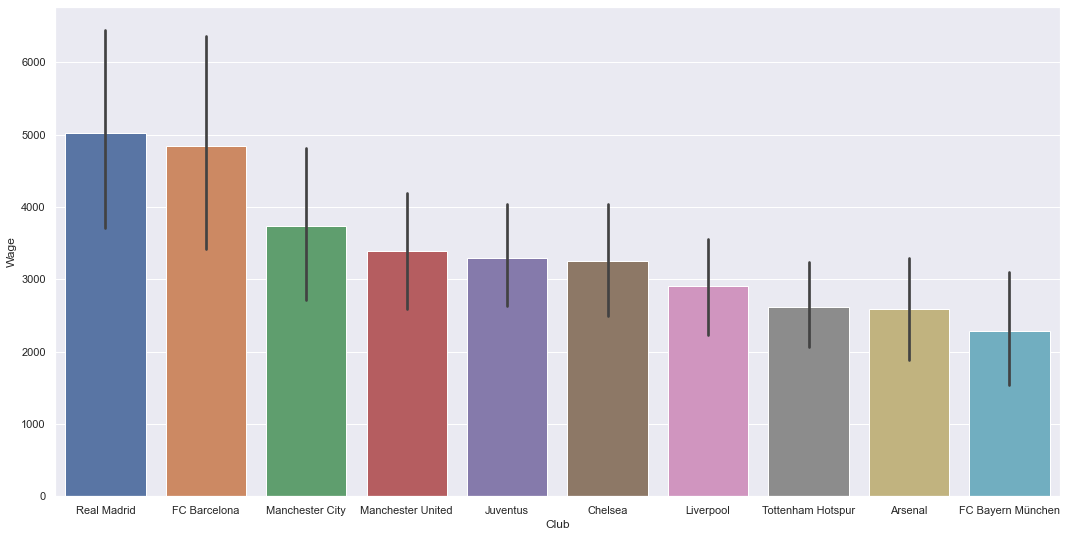

In [80]:
sns.barplot(data=df[df['Club'].isin(y)],x='Club',y='Wage',estimator=sum,order=res.index)

#### is there any outlier in the Age find it with 1- visualization 2-  with pandas ?

<AxesSubplot:xlabel='Age'>

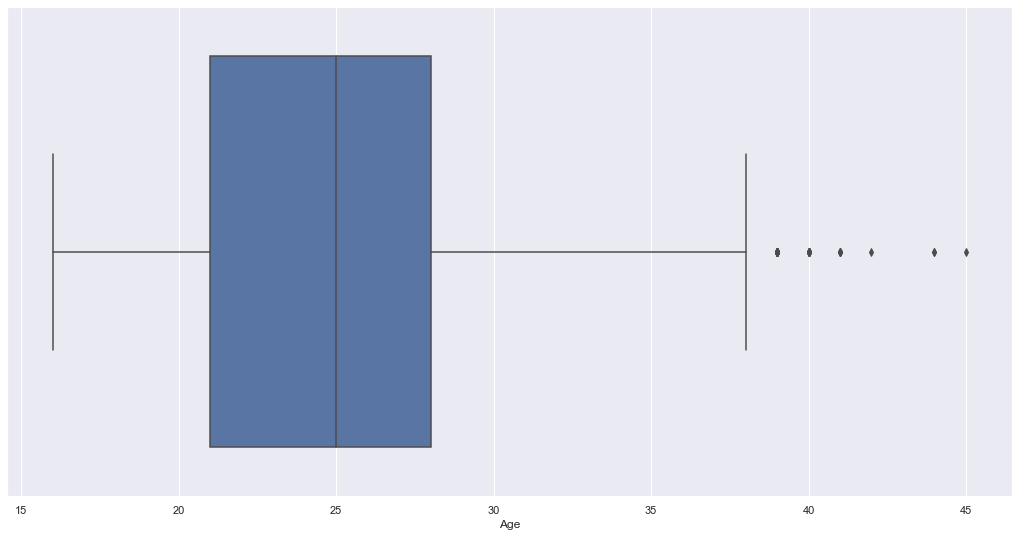

In [82]:
sns.boxplot(data=df,x= 'Age')

In [85]:
q1 = df['Age'].quantile(0.25)
q1

21.0

In [86]:
q2 = df['Age'].quantile(0.5)
q2

25.0

In [87]:
q3 = df['Age'].quantile(0.75)
q3

28.0

In [89]:
IQR = q3 - q1
IQR

7.0

In [93]:
q1 - (1.5 * IQR), q3 + (1.5 * IQR)

(10.5, 38.5)

In [98]:
df[(df['Age'] < (q1 - (1.5 * IQR))) | (df['Age'] > (q3 + (1.5 * IQR)))]

41       40
554      39
864      40
1120     41
1294     40
1952     39
2225     39
2706     39
2821     40
3128     39
3420     39
3550     40
3603     39
4062     39
4187     40
4228     41
4640     39
4646     39
4741     45
5040     39
5101     39
5608     39
6398     39
6861     39
7039     39
7225     41
7427     39
9484     40
10356    40
10487    39
10534    39
10545    42
11456    39
12192    41
12453    40
14129    40
14920    39
15133    39
15426    41
16264    40
16489    39
16596    40
17672    39
17726    44
17752    40
17842    39
18183    44
Name: Age, dtype: int64

In [101]:
print('No of outliers in Age Feature = ',sum(df[(df['Age'] < (q1 - (1.5 * IQR))) | (df['Age'] > (q3 + (1.5 * IQR)))]['Age'].value_counts()))

No of outliers in Age Feature =  47


#### Is there a correlation between Value and Overall and viusalize the results with two graphs?**

In [94]:
df['Overall'].corr(df['Value'])

0.6318477413577679

<AxesSubplot:xlabel='Value', ylabel='Overall'>

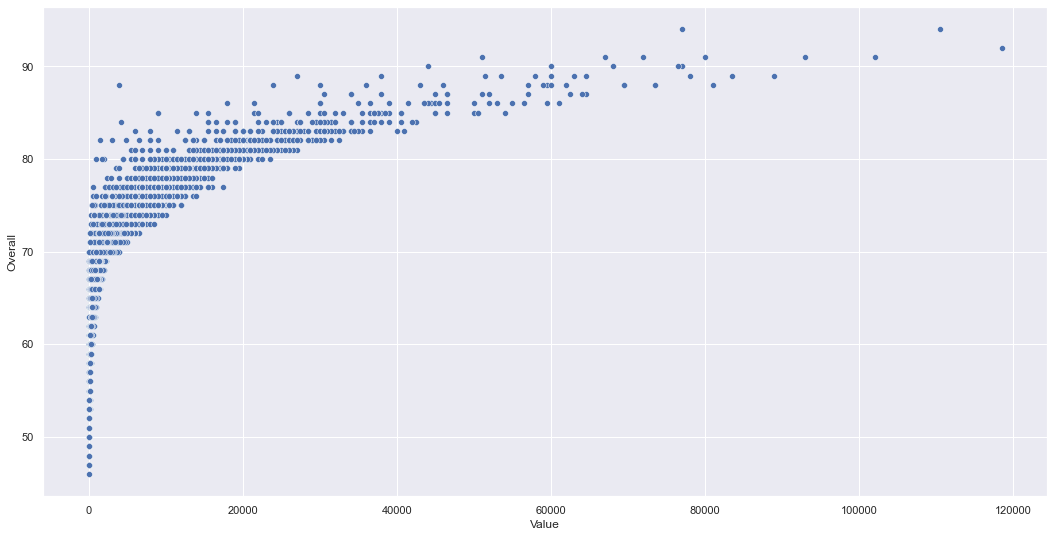

In [95]:
sns.scatterplot(data= df, x= 'Value', y= 'Overall')

<AxesSubplot:xlabel='Value', ylabel='Overall'>

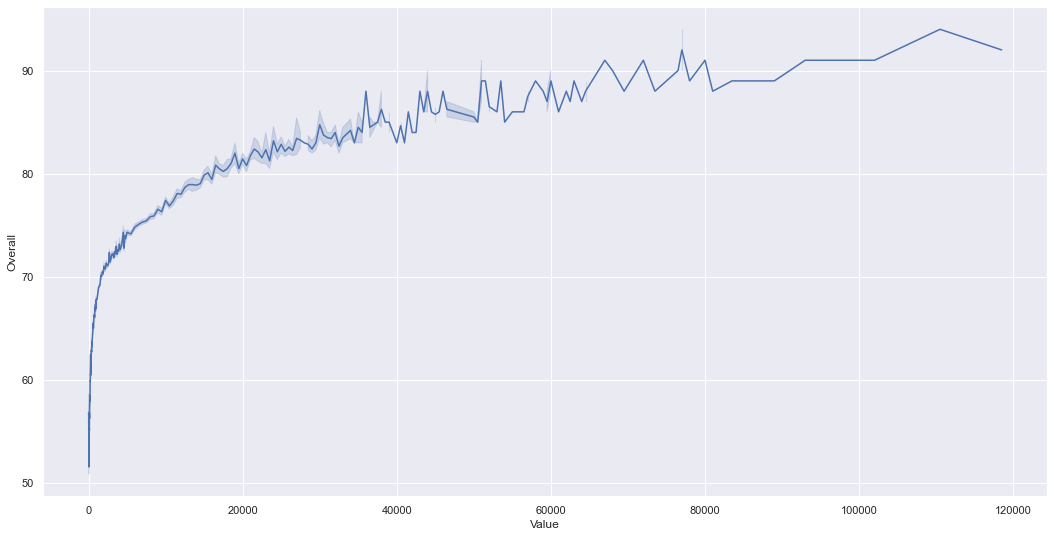

In [96]:
sns.lineplot(data= df, x= 'Value', y= 'Overall')

#### what are the ratio of the Preferred Foot and visualize with a graph ?

In [107]:
x = df['Preferred Foot'].value_counts()
x

Right    13996
Left      4211
Name: Preferred Foot, dtype: int64

In [116]:
print(f"ratio for right = {round(100 * (x['Right']/(x['Right']+x['Left'])))} %")
print(f"ratio for right = {round(100 * (x['Left']/(x['Right']+x['Left'])))} %")

ratio for right = 77 %
ratio for right = 23 %


<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

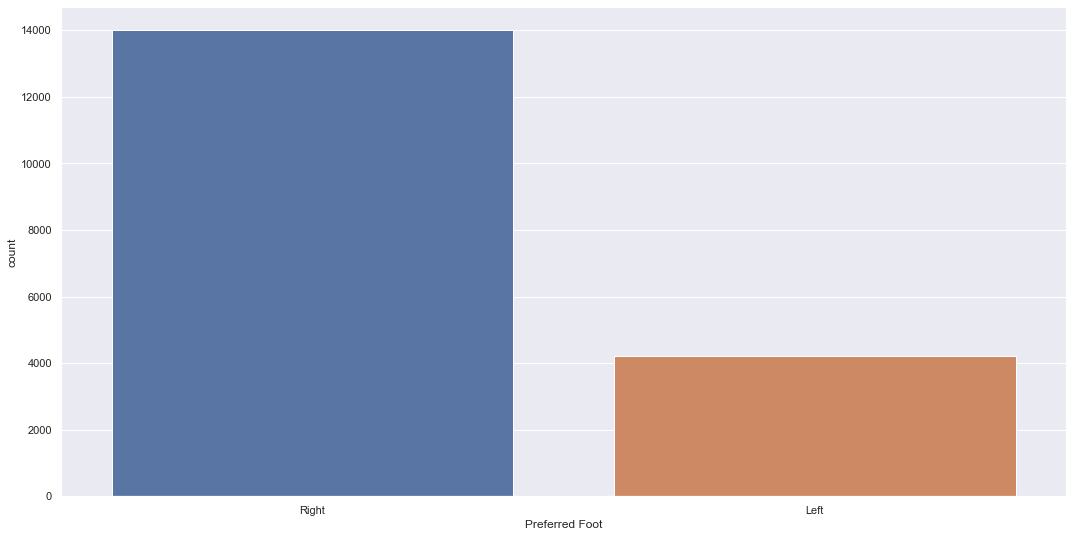

In [118]:
sns.countplot(data=df,x='Preferred Foot',order=x.index)

#### what are the top 10 average overall clubs and visualize with a graph ?

In [124]:
x = df.groupby('Club')[['Overall']].mean().sort_values(by='Overall',ascending=False).head(10)
x

,Overall
Club,
Juventus,82.280000
Napoli,80.000000
Inter,79.750000
Real Madrid,78.242424
Milan,78.074074
FC Barcelona,78.030303
Paris Saint-Germain,77.433333
Roma,77.423077
Manchester United,77.242424


<AxesSubplot:xlabel='Club', ylabel='Overall'>

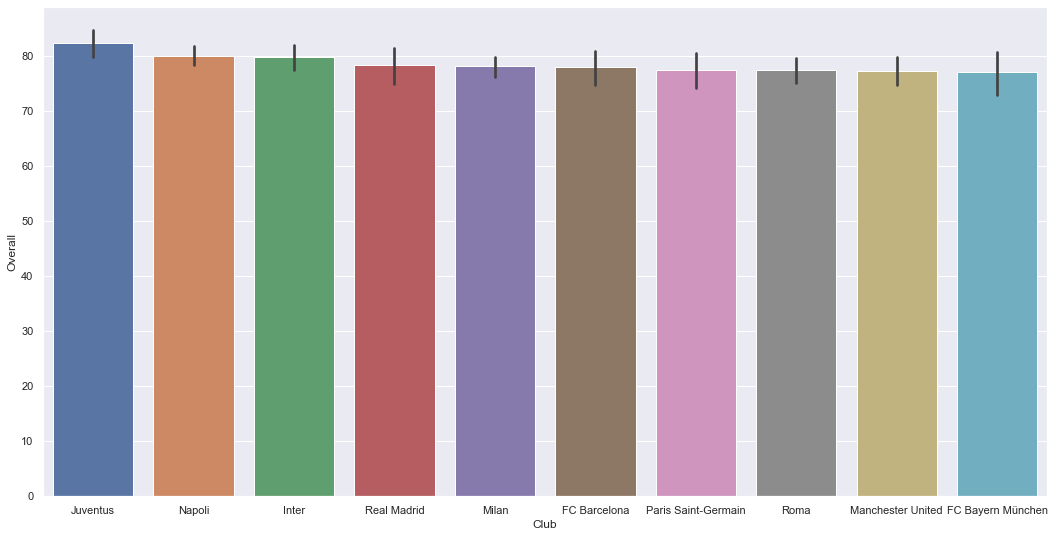

In [127]:
sns.barplot(data= df[df['Club'].isin(x.index)], x= 'Club', y= 'Overall',order=x.index)

**What are the top 5 most common nationality and visualize them with a graph?**

In [131]:
x = df['Nationality'].value_counts().head()
x

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64

<AxesSubplot:xlabel='Nationality', ylabel='count'>

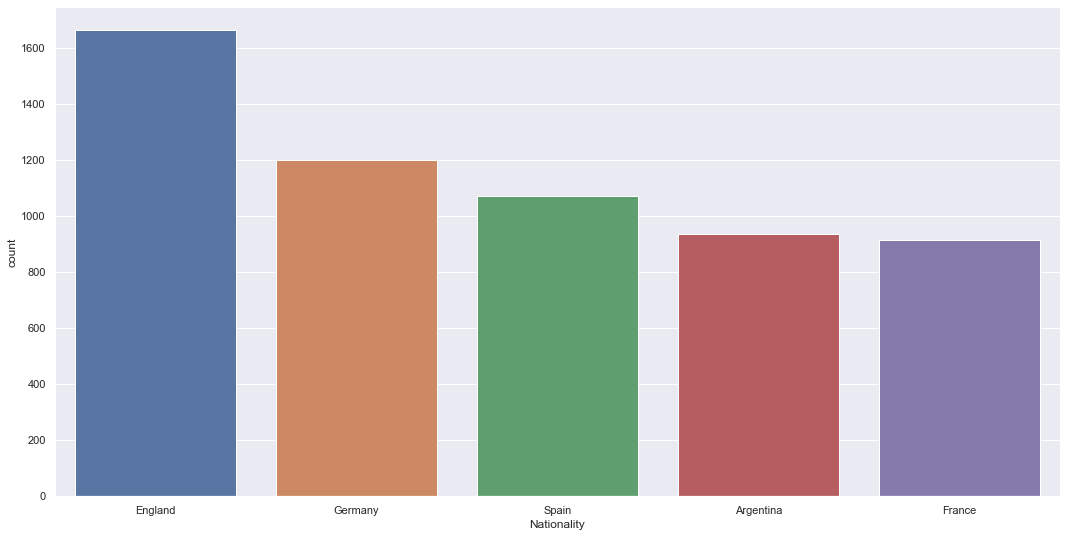

In [135]:
sns.countplot(data=df[df['Nationality'].isin(x.index)],x= 'Nationality',order=x.index)

# Great Job!